# Evaluación 3

## Ejercicio 1

### 1.1 Check if your country is a polygon or multipolygon

In [2]:
import os
import geopandas as gpd
from  fiona import listlayers
import matplotlib.pyplot as plt

In [3]:
peruMaps = "https://github.com/IntroSpatialDataScience/geodfEv3/raw/main/maps/peru_24891.gpkg"

In [4]:
listlayers(peruMaps)

['country', 'cities', 'rivers']

In [5]:
#Obtenemos cada mapa:
peru = gpd.read_file(peruMaps,layer="country")
peru_cities = gpd.read_file(peruMaps,layer = "cities")
peru_rivers = gpd.read_file(peruMaps,layer = "rivers")

In [6]:
#Luego, notamos que Peru es un POLIGONO
peru

,COUNTRY,geometry
0,Peru,"POLYGON ((1423874.178 857804.844, 1423768.489 ..."


### 1.2 Recover just the boundaries of that country

In [7]:
#Notamos que el borda está formado por una sola línea
peru.boundary

0    LINESTRING (1423874.178 857804.844, 1423768.48...
dtype: geometry

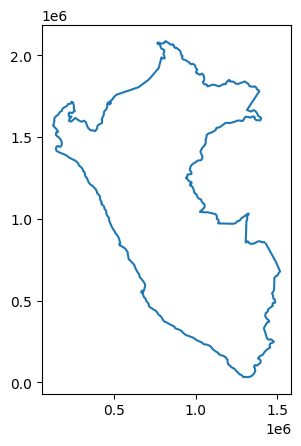

In [8]:
peru.boundary.plot()
plt.show()

### 1.3 Turn the boundary into a GDF

In [9]:
type(peru.boundary)

geopandas.geoseries.GeoSeries

In [10]:
peru.boundary.to_frame()

,0
0,"LINESTRING (1423874.178 857804.844, 1423768.48..."


In [11]:
peru_boundary = peru.boundary.to_frame()

In [12]:
peru_boundary["name"]="Peru"
peru_boundary

,0,name
0,"LINESTRING (1423874.178 857804.844, 1423768.48...",Peru


In [13]:
peru_boundary.rename(columns={0:"geometry"},inplace=True)
peru_boundary = peru_boundary.set_geometry("geometry")
peru_boundary

,geometry,name
0,"LINESTRING (1423874.178 857804.844, 1423768.48...",Peru


## Ejercicio 2

De aquí extraje el archivo shp de los bordes de Perú [here](https://data.humdata.org/dataset/cod-ab-per)

### 2.1 Look for sub administrative divisions of your country

In [14]:
peru_dep = gpd.read_file(os.path.join("maps","per_adm_ign_20200714_shp","per_admbnda_adm1_ign_20200714.shp"))
#peru_dep.plot()

In [15]:
peru_mun = gpd.read_file(os.path.join("maps","per_adm_ign_20200714_shp","per_admbnda_adm2_ign_20200714.shp"))
#peru_mun.plot()

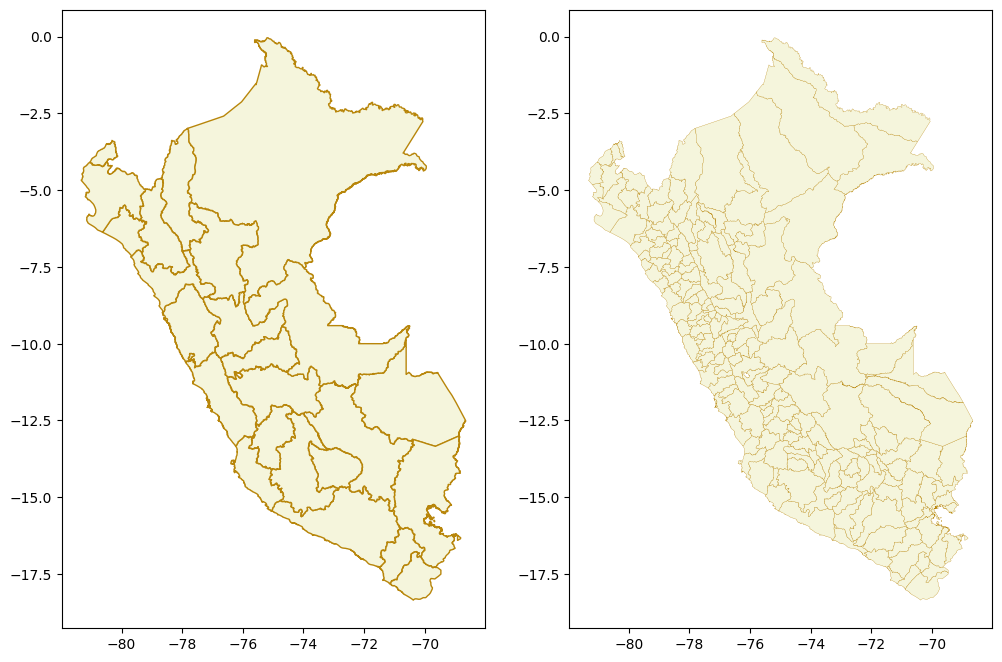

In [16]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=False, sharey=False, figsize=(12,12))

peru_dep.plot(ax=ax1, facecolor='beige', edgecolor='darkgoldenrod')
peru_mun.plot(ax=ax2, facecolor='beige', edgecolor='darkgoldenrod',linewidth=0.2)
plt.show()

### 2.2 Check all the CRSs of those divisions

In [17]:
peru_dep.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [18]:
peru_mun.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [19]:
peru_dep.geometry.head() # efectivamente son mapas no proyectados con crs 4326

0    POLYGON ((-77.81211 -2.98962, -77.81332 -2.990...
1    POLYGON ((-77.64692 -8.05086, -77.64669 -8.052...
2    POLYGON ((-73.74632 -13.17456, -73.74570 -13.1...
3    POLYGON ((-71.98109 -14.64062, -71.98093 -14.6...
4    POLYGON ((-74.34843 -12.17503, -74.35000 -12.1...
Name: geometry, dtype: geometry

### 2.3 If you find one CRS is missing, fill the CRS with the right projection

In [20]:
# Como los dos tienen CRS 4326, ahora los reproyectaré para que tengan unidades de longitud
peru_dep = peru_dep.to_crs(24891)
peru_mun = peru_mun.to_crs(24891)

peru_dep.crs

<Projected CRS: EPSG:24891>
Name: PSAD56 / Peru west zone
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: Peru - west of 79°W.
- bounds: (-81.41, -8.32, -79.0, -3.38)
Coordinate Operation:
- name: Peru west zone
- method: Transverse Mercator
Datum: Provisional South American Datum 1956
- Ellipsoid: International 1924
- Prime Meridian: Greenwich

## Ejercicio 3

### 3.1 Look for some points in a CSV file about your country.

In [21]:
import pandas as pd
infohealth = pd.read_csv(os.path.join("data","peru_health_sities.csv"))

infohealth.head()

,X,Y,osm_id,osm_type,completeness,#meta +operator,#meta +health_amenity_type,#meta+dispensing,#meta +speciality,#meta+is_in_health_zone,...,addr_postcode,#meta+water_source,addr_city,#meta+wheelchair,#capacity +beds,changeset_user,#geo+bounds+url,addr_housenumber,#meta+healthcare,#loc +name
0,-75.506386,-11.895442,7061666697,node,15,Gobierno Regional,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,karitotp_peruimport,NaN,NaN,NaN,Patacancha
1,-76.125374,-10.247465,7073535192,node,12,Gobierno Regional,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,karitotp_peruimport,NaN,NaN,NaN,Ayancocha Alta
2,-73.034027,-12.525074,6867639865,node,12,Gobierno Regional,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,karitotp_peruimport,NaN,NaN,NaN,Kamanquiriato
3,-75.890124,-13.723504,6347881785,node,15,Gobierno Regional,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,karitotp_peruimport,NaN,NaN,NaN,C.S. Humay
4,-75.215294,-12.072449,5043483801,node,15,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Baconcrisp,Reconocimiento terrestre cartográfico realizad...,NaN,NaN,Farmacia Mafer


In [22]:
col=['X','Y','#meta +operator','#loc +name','#loc+amenity']
infohealth=infohealth.loc[:,col]
infohealth

,X,Y,#meta +operator,#loc +name,#loc+amenity
0,-75.506386,-11.895442,Gobierno Regional,Patacancha,doctors
1,-76.125374,-10.247465,Gobierno Regional,Ayancocha Alta,doctors
2,-73.034027,-12.525074,Gobierno Regional,Kamanquiriato,doctors
3,-75.890124,-13.723504,Gobierno Regional,C.S. Humay,clinic
4,-75.215294,-12.072449,NaN,Farmacia Mafer,pharmacy
...,...,...,...,...,...
13777,-79.001803,-8.085416,NaN,Prodent,dentist
13778,-74.226451,-13.160537,NaN,Mifarma,pharmacy
13779,-76.052600,-11.151853,Gobierno Regional,Sasicucho,doctors
13780,-79.007135,-8.112350,NaN,Botica Alva,pharmacy


In [23]:
infohealth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13782 entries, 0 to 13781
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   X                11657 non-null  float64
 1   Y                11657 non-null  float64
 2   #meta +operator  7191 non-null   object 
 3   #loc +name       13189 non-null  object 
 4   #loc+amenity     13728 non-null  object 
dtypes: float64(2), object(3)
memory usage: 538.5+ KB


In [24]:
infohealth.rename(columns={'#loc +name':'localizacion','#loc+amenity':'tipo'},inplace=True)

In [25]:
infohealth

,X,Y,#meta +operator,localizacion,tipo
0,-75.506386,-11.895442,Gobierno Regional,Patacancha,doctors
1,-76.125374,-10.247465,Gobierno Regional,Ayancocha Alta,doctors
2,-73.034027,-12.525074,Gobierno Regional,Kamanquiriato,doctors
3,-75.890124,-13.723504,Gobierno Regional,C.S. Humay,clinic
4,-75.215294,-12.072449,NaN,Farmacia Mafer,pharmacy
...,...,...,...,...,...
13777,-79.001803,-8.085416,NaN,Prodent,dentist
13778,-74.226451,-13.160537,NaN,Mifarma,pharmacy
13779,-76.052600,-11.151853,Gobierno Regional,Sasicucho,doctors
13780,-79.007135,-8.112350,NaN,Botica Alva,pharmacy


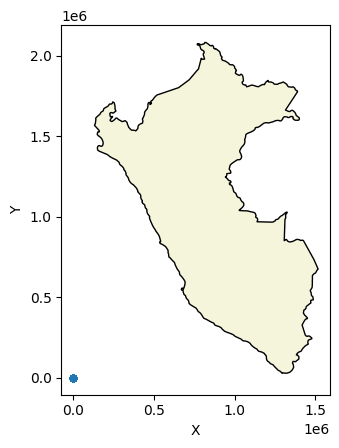

In [26]:
base = peru.plot(color='beige', edgecolor='black')
infohealth.plot.scatter(x = 'X', y = 'Y',ax=base)
plt.show()

### 3.2 Turn those points into a spatial object

In [27]:
#Solucionamos esto dándole un crs al conjunto de puntos
healthsites=gpd.GeoDataFrame(data=infohealth.copy(),geometry=gpd.points_from_xy(infohealth.X,infohealth.Y),crs=4326)

In [28]:
healthsites = healthsites.to_crs(24891)

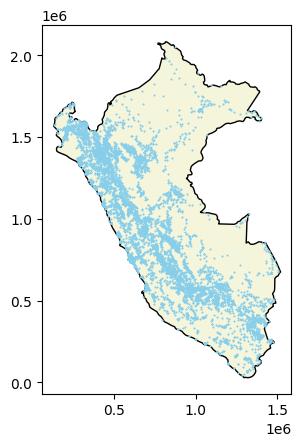

In [29]:
base = peru.plot(color='beige', edgecolor='black')
healthsites.plot(ax=base,edgecolor='skyblue',marker='*',markersize=0.2)
plt.show()

In [30]:
type(healthsites)

geopandas.geodataframe.GeoDataFrame

### 3.3 Save the layer.

In [31]:
healthsites.to_file(os.path.join("maps","peru_health_24891.gpkg"), layer='healthsites', driver="GPKG")

In [32]:
#Comprobamos si funciona bien la capa guardada

In [33]:
peru_health='https://github.com/IntroSpatialDataScience/geodfEv3/raw/main/maps/peru_health_24891.gpkg'

In [34]:
from  fiona import listlayers

listlayers(peru_health)

['healthsites']

In [35]:
health=gpd.read_file(peru_health,layer='healthsites')

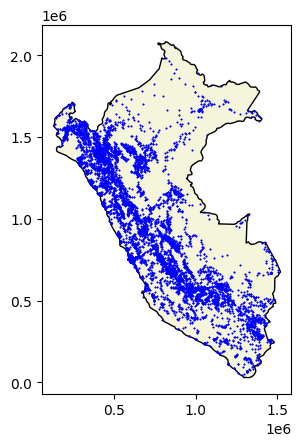

In [36]:
base = peru.plot(color='beige', edgecolor='black')
health.plot(ax=base,marker='*',edgecolor='blue',markersize=0.2)
plt.show()

## Ejercicio 4

### 4.1. Compute the centroid of your country.

In [37]:
centroPeru=peru.centroid
centroPeru

0    POINT (893956.209 1073003.180)
dtype: geometry

In [38]:
centroPeru.x

0    893956.209229
dtype: float64

In [39]:
centroX=centroPeru.x[0]
centroY=centroPeru.y[0]

### 4.2. Combine all the polygons to the north, and also all the polygons to the south; use unary union.

In [40]:
peru_mun.geometry

0      POLYGON ((1045786.713 597763.851, 1045829.940 ...
1      POLYGON ((855015.285 691365.789, 855106.295 69...
2      POLYGON ((1171514.495 557209.271, 1171573.758 ...
3      POLYGON ((539112.829 1022378.869, 539251.073 1...
4      POLYGON ((688325.260 1680594.719, 688563.438 1...
                             ...                        
191    POLYGON ((672376.252 862912.610, 672349.644 86...
192    POLYGON ((715648.858 761385.854, 715761.796 76...
193    POLYGON ((544216.395 1105170.970, 544325.312 1...
194    MULTIPOLYGON (((1478042.136 246305.604, 146635...
195    POLYGON ((246113.049 1713256.626, 246240.857 1...
Name: geometry, Length: 196, dtype: geometry

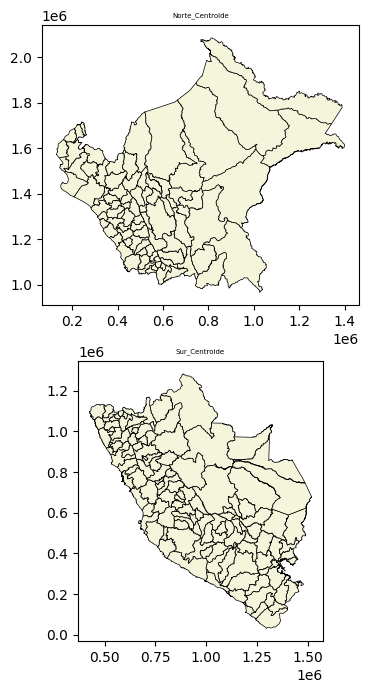

In [41]:
fig, axs = plt.subplots(nrows=2,ncols=1,sharex=False,sharey=False,figsize=(8,8))

axs[0].set_title('Norte_Centroide', fontsize=5)
peru_mun.cx[:,centroY:].plot(ax=axs[0], facecolor='beige', edgecolor='black', linewidth=0.5)

axs[1].set_title('Sur_Centroide',fontsize=5)
peru_mun.cx[:,:centroY].plot(ax=axs[1],facecolor='beige',edgecolor='black',linewidth=0.5) 

plt.show()

In [42]:
#Combinando todo el norte y todo el sur
#UNARY UNION

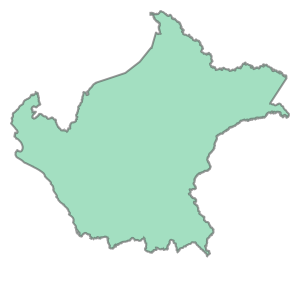

In [43]:
peru_mun.cx[:,centroY:].unary_union

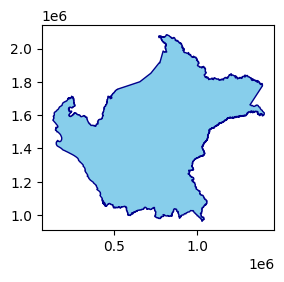

In [44]:
NorPeru = gpd.GeoDataFrame(index=[0],
                 crs=peru_mun.crs,
                 geometry=[peru_mun.cx[:,centroY:].unary_union])
NorPeru.plot(facecolor='skyblue',edgecolor='darkblue',markersize=0.2,figsize=(3,3))
plt.show()

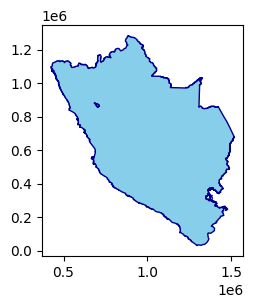

In [45]:
SurPeru = gpd.GeoDataFrame(index=[0],
                 crs=peru_mun.crs,
                 geometry=[peru_mun.cx[:,:centroY].unary_union])
SurPeru.plot(facecolor='skyblue',edgecolor='darkblue',markersize=0.2,figsize=(3,3))
plt.show()

### 4.3. Detect the amount of duplicates after the combination.

In [46]:
peru_mun

,Shape_Leng,Shape_Area,ADM2_ES,ADM2_PCODE,ADM2_REF,ADM2ALT1ES,ADM2ALT2ES,ADM1_ES,ADM1_PCODE,ADM0_EN,ADM0_ES,ADM0_PCODE,date,validOn,validTo,geometry
0,3.535264,0.288842,Abancay,PE0301,None,None,None,Apurimac,PE03,Peru,Perú (el),PE,2015-07-24,2020-07-14,None,"POLYGON ((1045786.713 597763.851, 1045829.940 ..."
1,1.761271,0.077181,Acobamba,PE0902,None,None,None,Huancavelica,PE09,Peru,Perú (el),PE,2015-07-24,2020-07-14,None,"POLYGON ((855015.285 691365.789, 855106.295 69..."
2,1.625998,0.077840,Acomayo,PE0802,None,None,None,Cusco,PE08,Peru,Perú (el),PE,2015-07-24,2020-07-14,None,"POLYGON ((1171514.495 557209.271, 1171573.758 ..."
3,1.576139,0.057312,Aija,PE0202,None,None,None,Ancash,PE02,Peru,Perú (el),PE,2015-07-24,2020-07-14,None,"POLYGON ((539112.829 1022378.869, 539251.073 1..."
4,9.964011,1.569570,Alto Amazonas,PE1602,None,None,None,Loreto,PE16,Peru,Perú (el),PE,2015-07-24,2020-07-14,None,"POLYGON ((688325.260 1680594.719, 688563.438 1..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,3.414807,0.301437,Yauli,PE1208,None,None,None,Junin,PE12,Peru,Perú (el),PE,2015-07-24,2020-07-14,None,"POLYGON ((672376.252 862912.610, 672349.644 86..."
192,4.338329,0.581513,Yauyos,PE1510,None,None,None,Lima,PE15,Peru,Perú (el),PE,2015-07-24,2020-07-14,None,"POLYGON ((715648.858 761385.854, 715761.796 76..."
193,2.661169,0.112125,Yungay,PE0220,None,None,None,Ancash,PE02,Peru,Perú (el),PE,2015-07-24,2020-07-14,None,"POLYGON ((544216.395 1105170.970, 544325.312 1..."
194,1.839592,0.035238,Yunguyo,PE2113,None,None,None,Puno,PE21,Peru,Perú (el),PE,2015-07-24,2020-07-14,None,"MULTIPOLYGON (((1478042.136 246305.604, 146635..."


In [47]:
#Numero de filas del DF original
peru_mun.shape[0]

196

In [48]:
peru_mun.cx[:,centroY:].shape[0]

84

In [49]:
peru_mun.cx[:,:centroY].shape[0]

126

In [50]:
#Suma de filas en los dos 
rowsCX=(peru_mun.cx[:,centroY:].shape[0],\
        peru_mun.cx[:,:centroY].shape[0])
sum(rowsCX)

210

In [51]:
# Coincidencias 
len(set(peru_mun.cx[:,centroY:].ADM2_PCODE). \
intersection(set(peru_mun.cx[:,:centroY].ADM2_PCODE)))

14

### 4.4. Plot both maps so that duplicates appear.

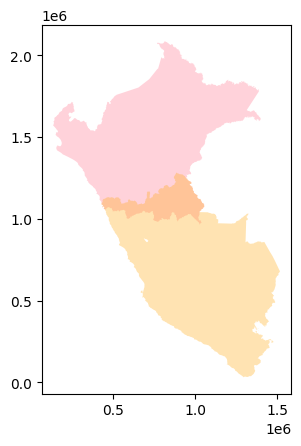

In [52]:
base=NorPeru.plot(facecolor='pink', alpha=0.7)
SurPeru.plot(ax=base,facecolor='orange', alpha=0.3)
plt.show()

## Exercise 5 

### 5.1. Select some points from your maps.

In [53]:
healthNO = healthsites.cx[:centroX,centroY:]
healthSO = healthsites.cx[:centroX,:centroY]
healthNE = healthsites.cx[centroX:,centroY:]
healthSE = healthsites.cx[centroX:,:centroY]

In [54]:
healthSE.head()

,X,Y,#meta +operator,localizacion,tipo,geometry
2,-73.034027,-12.525074,Gobierno Regional,Kamanquiriato,doctors,POINT (1035681.433 694088.414)
6,-74.087529,-14.721853,Gobierno Regional,Chilques,doctors,POINT (913957.606 452756.213)
8,-70.185735,-15.432646,Gobierno Regional,Unocolla,doctors,POINT (1334321.651 357142.234)
11,-71.857239,-16.421989,Gobierno Regional,Puesto de Salud Benito Lazo,doctors,POINT (1148188.660 254672.979)
17,-70.341706,-15.279494,Gobierno Regional,Quelloquello,doctors,POINT (1318165.493 375134.627)


In [55]:
#healthsites

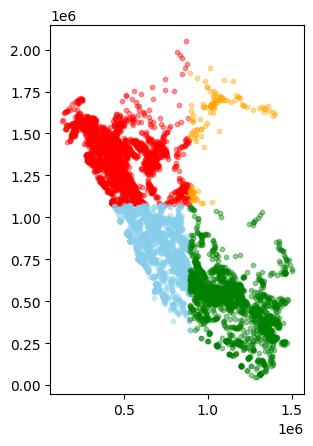

In [56]:
base = healthNO.plot(facecolor='red',alpha=0.4,markersize=10)
healthSO.plot(ax=base,facecolor='skyblue',alpha=0.4,markersize=10)
healthNE.plot(ax=base,facecolor='orange',alpha=0.4,markersize=10)
healthSE.plot(ax=base,facecolor='green',alpha=0.4,markersize=10)
plt.show()

In [57]:
healthNE_clinic = healthsites[healthsites.tipo=="clinic"].cx[centroX:,centroY:]

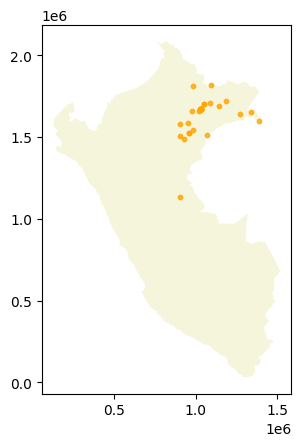

In [58]:
base = peru.plot(facecolor='beige',alpha=1,markersize=10)
healthNE_clinic.plot(ax=base,facecolor='orange',alpha=0.8,markersize=10)
plt.show()

### 5.2. Create the convex hull for those points.

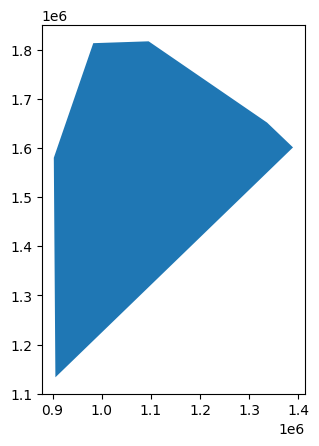

In [59]:
healthNE_clinic.dissolve().convex_hull.plot()
plt.show()

    
### 5.3. Turn the hull into a GDF.

In [60]:
#Vemos que el convex hull es una geoserie, ahora la convertimos en un GDF

In [61]:
type(healthNE_clinic.dissolve().convex_hull)

geopandas.geoseries.GeoSeries

In [62]:
healthNE_clinic.crs

<Projected CRS: EPSG:24891>
Name: PSAD56 / Peru west zone
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: Peru - west of 79°W.
- bounds: (-81.41, -8.32, -79.0, -3.38)
Coordinate Operation:
- name: Peru west zone
- method: Transverse Mercator
Datum: Provisional South American Datum 1956
- Ellipsoid: International 1924
- Prime Meridian: Greenwich

In [63]:
healthNE_clinic_hull= gpd.GeoDataFrame(index=[0],crs=healthNE_clinic.crs, geometry=healthNE_clinic.dissolve().convex_hull)
healthNE_clinic_hull

,geometry
0,"POLYGON ((905724.426 1133402.718, 902486.993 1..."


### 5.4. Plot the hull on top of the country.

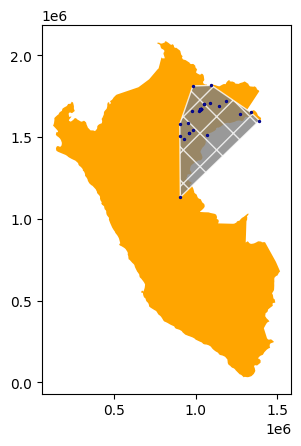

In [64]:
base=peru.plot(facecolor='orange')
healthNE_clinic_hull.plot(ax=base,facecolor='gray',edgecolor='white',alpha=0.8,hatch='X')
healthNE_clinic.plot(ax=base,marker='.',edgecolor='darkblue',markersize=8)
plt.show()

## Exercise 6 

### 6.1. Apply two of these operations to your maps.

#### *Intersection*

In [69]:
peru_munN = peru_mun.cx[:,centroY:]
peru_munS = peru_mun.cx[:,:centroY]
peru_munE = peru_mun.cx[centroX:,:]
peru_munO = peru_mun.cx[:centroX,:]

In [72]:
peru_munN

,Shape_Leng,Shape_Area,ADM2_ES,ADM2_PCODE,ADM2_REF,ADM2ALT1ES,ADM2ALT2ES,ADM1_ES,ADM1_PCODE,ADM0_EN,ADM0_ES,ADM0_PCODE,date,validOn,validTo,geometry
4,9.964011,1.569570,Alto Amazonas,PE1602,None,None,None,Loreto,PE16,Peru,Perú (el),PE,2015-07-24,2020-07-14,None,"POLYGON ((688325.260 1680594.719, 688563.438 1..."
10,1.068330,0.045972,Antonio Raymondi,PE0203,None,None,None,Ancash,PE02,Peru,Perú (el),PE,2015-07-24,2020-07-14,None,"POLYGON ((597541.275 1096511.919, 597597.737 1..."
12,2.645139,0.216514,Ascope,PE1302,None,None,None,La Libertad,PE13,Peru,Perú (el),PE,2015-07-24,2020-07-14,None,"POLYGON ((370493.051 1269112.249, 370560.459 1..."
13,0.977639,0.043418,Asuncion,PE0204,None,None,None,Ancash,PE02,Peru,Perú (el),PE,2015-07-24,2020-07-14,None,"POLYGON ((564539.366 1087631.016, 564610.381 1..."
15,3.943959,0.423496,Ayabaca,PE2002,None,None,None,Piura,PE20,Peru,Perú (el),PE,2015-07-24,2020-07-14,None,"POLYGON ((262802.777 1616620.732, 262860.832 1..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,10.880433,2.432348,Ucayali,PE1606,None,None,None,Loreto,PE16,Peru,Perú (el),PE,2015-07-24,2020-07-14,None,"POLYGON ((851241.010 1432660.661, 851574.254 1..."
186,3.516571,0.325419,Utcubamba,PE0107,None,None,None,Amazonas,PE01,Peru,Perú (el),PE,2015-07-24,2020-07-14,None,"POLYGON ((489076.034 1497169.241, 489074.551 1..."
189,2.984379,0.261415,Viru,PE1312,None,None,None,La Libertad,PE13,Peru,Perú (el),PE,2015-07-24,2020-07-14,None,"POLYGON ((426240.777 1189254.709, 426426.130 1..."
193,2.661169,0.112125,Yungay,PE0220,None,None,None,Ancash,PE02,Peru,Perú (el),PE,2015-07-24,2020-07-14,None,"POLYGON ((544216.395 1105170.970, 544325.312 1..."


In [73]:
peru_munNS= peru_munN.overlay(peru_munS, how="intersection",keep_geom_type=True)

In [67]:
len(peru_munNS)

14

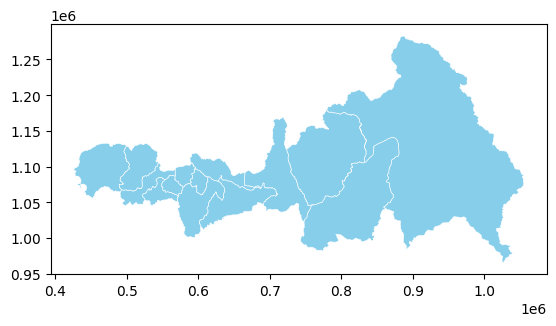

In [68]:
peru_munNS.plot(facecolor='skyblue',edgecolor='white',linewidth=0.4)
plt.show()

In [76]:
peru_munEO= peru_munE.overlay(peru_munO, how="intersection",keep_geom_type=True)

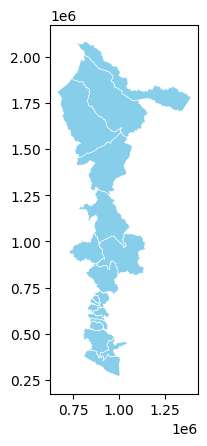

In [77]:
peru_munEO.plot(facecolor='skyblue',edgecolor='white',linewidth=0.4)
plt.show()

#### *Difference*

In [84]:
peru_munDiff = peru_mun.overlay(peru_munNS, how='difference').dissolve()

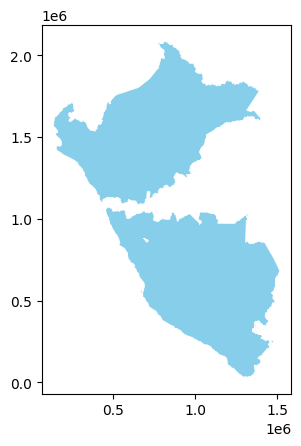

In [85]:
peru_munDiff.plot(facecolor='skyblue',edgecolor='white',linewidth=0.4)
plt.show()

### 6.2. Apply two of these operations to the  next maps: